In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy import optimize
import seaborn as sns

from matplotlib import rc
sns.set_palette('colorblind')
sns.set_context('paper', font_scale=1.5)
sns.set_style('white')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [2]:
img = np.load('../matrices/NORMALIZED-RP-STACK.npy')

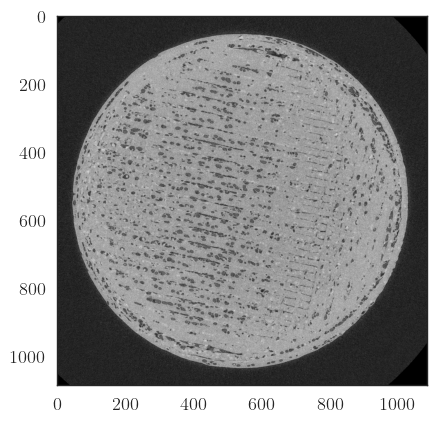

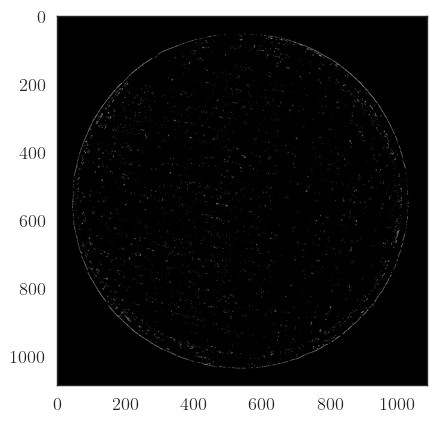

In [3]:
layer = 80
mat = img[:,:,layer]
#ret, mat = cv.threshold(mat, 120, 255, cv.THRESH_TOZERO)
mat = cv.Canny(mat, 500, 500)
bitmat = mat//255

plt.imshow(img[:,:,layer], cmap='gray')
plt.show()

plt.imshow(mat, cmap='gray')
plt.show()

In [4]:
def cost(params):
    x,y,r = np.int64(params)
    if r < 0:
        return 1e14
    mask = np.zeros([1085, 1085], dtype=np.uint8)
    mask = cv.circle(mask, [x,y], r, [1,1,1])
    return -np.sum(np.logical_and(bitmat, mask))

x0,y0,r0 = optimize.fmin(cost, (543, 543, 493))

print(x0)
print(y0)
print(r0)

print(np.int32(r0))

Optimization terminated successfully.
         Current function value: -828.000000
         Iterations: 39
         Function evaluations: 120
538.8121970554246
544.7280223194532
492.52193097674956
492


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


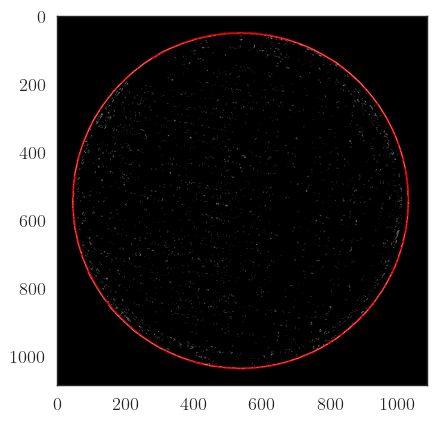

In [5]:
mask = np.zeros([1085,1085,3], dtype=np.uint8)
mask = cv.circle(mask, [np.uint32(x0), np.uint32(y0)], np.uint32(r0), [1,0,0], 3)

plh = np.zeros([1085,1085,3])
plh[:,:,0] = mat
plh[:,:,1] = mat
plh[:,:,2] = mat

plt.imshow(plh+mask)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\TJ\AppData\Local\Temp\ipykernel_1312\2959630848.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


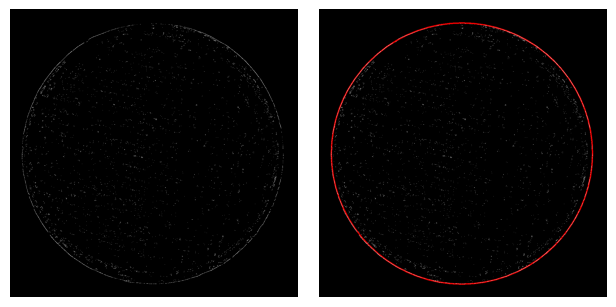

In [6]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(mat, cmap='gray')
axs[1].imshow(plh+mask)
axs[0].axis('off')
axs[1].axis('off')

fig.tight_layout()
fig.show()

In [7]:
radii = []
xs = []
ys = []
for i in range(1789):
    mat = img[:,:,i]
    mat = cv.Canny(mat, 500, 500)
    bitmat = mat // 255

    def cost(params):
        x,y,r = np.int64(params)
        if r < 0:
            return 1e14
        mask = np.zeros([1085, 1085], dtype=np.uint8)
        mask = cv.circle(mask, [x,y], r, [1,1,1])
        return -np.sum(np.logical_and(bitmat, mask))

    x0,y0,r0 = optimize.fmin(cost, (543, 543, 493), full_output=False, disp=False, retall=False)
    radii.append(np.int16(r0))
    xs.append(np.int16(x0))
    ys.append(np.int16(y0))

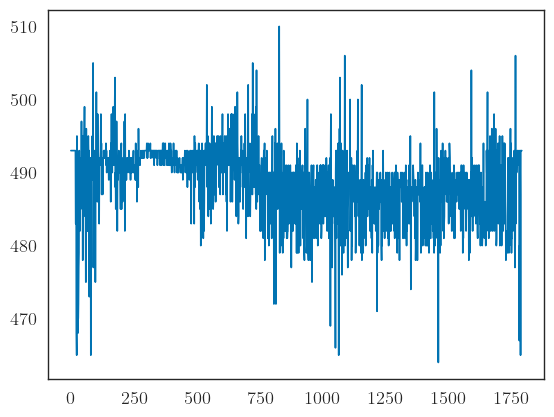

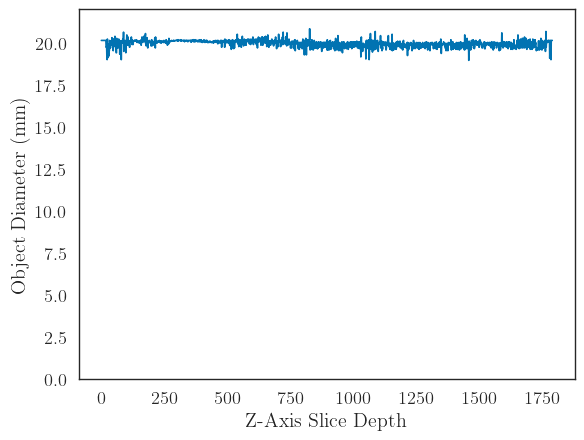

In [8]:
plt.plot(range(1789), radii)
plt.show()

dias = 2.*np.asarray(radii)*20.4382 / 1000
plt.plot(range(1789), dias)
plt.ylabel("Object Diameter (mm)")
plt.xlabel("Z-Axis Slice Depth")
#plt.title("Diameter Variation Through Scanned Object")
plt.ylim([0,22])
plt.show()

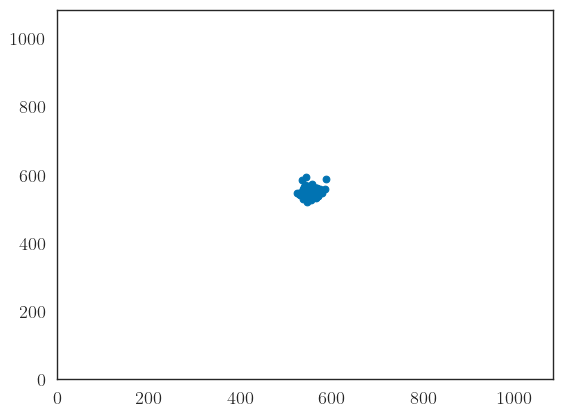

In [10]:
plt.scatter(xs,ys)
plt.ylim(0,1085)
plt.xlim(0,1085)
plt.show()

In [11]:
np.save("./radii.npy", radii)
np.save("./xs.npy", xs)
np.save("./ys.npy", ys)

In [15]:
print(2*np.mean(radii) * 20.4382)

19965.825101397426
